In [1]:
import io
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

# 조건에 맞는 예상수익 예측
**1. 데이터 로드 : 데이터 전처리를 마친 현재 프랜차이즈 매물 데이터셋을 가져온다**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/codestates/cp1 dataset/cp1datafinal.csv')

In [4]:
df = df.drop('column1',axis = 1)
df = df.drop('phonenum',axis = 1)
df = df.drop('pcname',axis = 1)
#df = df.drop('id',axis = 1)
df = df.drop('size',axis = 1)

In [5]:
df

,id,foodtype,locate,expectedmoney,capital
0,723583,고기,서울,1780.0,20000
1,722968,퓨전음식,강남구,NaN,8000
2,720667,퓨전음식,종로구,890.0,18000
3,722103,퓨전음식,영등포구,1550.0,11000
4,722222,퓨전음식,김포시,3750.0,42000
...,...,...,...,...,...
1224,720665,퓨전음식,종로구,870.0,19000
1225,715770,베이커리,서울,1350.0,23000
1226,706858,베이커리,구로구,1050.0,47000
1227,717883,고기,서울,1300.0,19000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1229 non-null   int64  
 1   foodtype       1229 non-null   object 
 2   locate         1229 non-null   object 
 3   expectedmoney  1122 non-null   float64
 4   capital        1229 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 48.1+ KB


**1-1. 데이터 전처리 ** </br></br>
이미 전처리를 마친 데이터 셋이지만 웹페이지의 창업지역 조건을 '경기' '서울' 인천' 으로 지정하였으므로 'locate' 컬럼의 데이터들의 조정이 필요.</br>
결측치 제거

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122 entries, 0 to 1228
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1122 non-null   int64  
 1   foodtype       1122 non-null   object 
 2   locate         1122 non-null   object 
 3   expectedmoney  1122 non-null   float64
 4   capital        1122 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 52.6+ KB


In [9]:
df['locate'].value_counts()

서울      236
경기      134
송파구      59
인천       50
강남구      45
수원시      44
성남시      38
강서구      32
서초구      29
구로구      25
고양시      25
종로구      25
관악구      21
영등포구     20
강동구      19
동대문구     18
마포구      18
용인시      18
서대문구     18
중구       18
강북구      16
김포시      16
동작구      15
평택시      14
안양시      13
시흥시      12
용산구      10
광진구      10
노원구      10
양천구      10
하남시       8
남양주시      8
부천시       7
금천구       7
부평구       7
성북구       6
서구        6
성동구       6
남동구       5
광명시       5
도봉구       5
의정부시      5
안산시       4
연수구       4
화성군       4
구리시       3
가평군       2
은평구       2
군포시       2
과천시       2
남구        1
포천군       1
계양구       1
중랑구       1
화성시       1
양주시       1
Name: locate, dtype: int64

In [10]:
incheon = {'locate' : {'중구':'인천', '동구':'인천', '서구':'인천', '남구':'인천', '연수구':'인천', '계양구':'인천', '강화군': '인천','옹진군': '인천', '남동구': '인천', '부평구': '인천'}}
df1 = df.replace(incheon)

In [11]:
seoul1 = {'locate' : {'송파구':'서울', '강남구':'서울', '강서구':'서울', '서초구':'서울', '구로구':'서울', '종로구':'서울', '강동구': '서울','영등포구': '서울', '관악구': '서울', '동대문구': '서울'}}
seoul2 = {'locate' : {'마포구':'서울', '서대문구':'서울', '강북구':'서울', '동작구':'서울', '광진구':'서울', '노원구':'서울', '용산구': '서울','양천구': '서울', '금천구': '서울', '성북구': '서울'}}
seoul3 = {'locate' : {'성동구':'서울', '도봉구':'서울', '은평구':'서울', '중랑구':'서울' }}
df1 = df1.replace(seoul1)
df1 = df1.replace(seoul2)
df1 = df1.replace(seoul3)

In [12]:
Gyeonggi1 = {'locate' : {'수원시':'경기', '성남시':'경기', '고양시':'경기', '용인시':'경기', '김포시':'경기', '평택시':'경기', '안양시': '경기','시흥시': '경기', '남양주시': '경기', '하남시': '경기'}}
Gyeonggi2 = {'locate' : {'부천시':'경기', '광명시':'경기', '의정부시':'경기', '화성군':'경기', '안산시':'경기', '구리시':'경기', '군포시': '경기','과천시': '경기', '가평군': '경기', '화성시': '경기', '포천군': '경기', '양주시': '경기'}}
df1 = df1.replace(Gyeonggi1)
df1 = df1.replace(Gyeonggi2)

In [13]:
df1['locate'].value_counts()

서울    663
경기    367
인천     92
Name: locate, dtype: int64

  ***2. 데이터 분석, 시각화 ***
</br>
**2.1. 타겟 변수 확인 (Distribution of Target)**

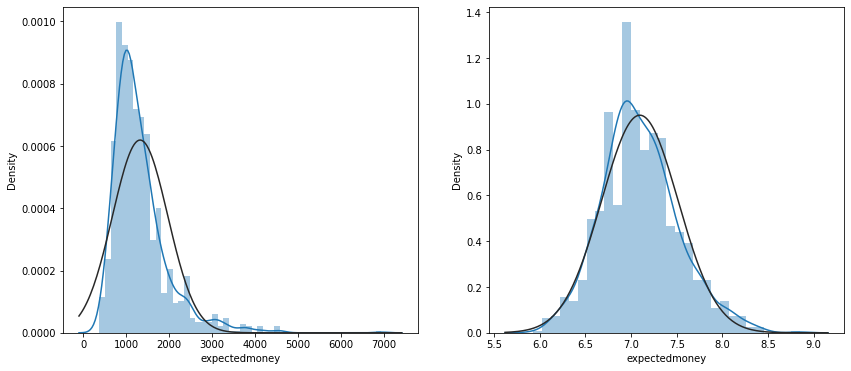

In [14]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.distplot(df1['expectedmoney'], fit=norm, ax=ax1)
sns.distplot(np.log(df1['expectedmoney']+1), fit=norm, ax=ax2)

좌 : 타겟 변수의 분포, 우 : 타겟변수에 로그를 취한 분포. 우측이 더 정규분포에 가깝게 보인다. </br> </br>
로그를 취하면 비대칭도가 줄어들고, 정규분포에 가깝게 데이터가 분포되어 있는 것을 확인할 수 있다. 머신러닝에게 로그를 취한 값을 타겟 변수로 주어서 예측하게끔 한 다음에, 마지막에 지수 계산을 해서 결과값을 도출한다.

**2.2. 변수간 상관관계 확인 (Feature Correlation)**

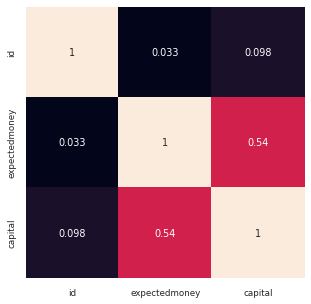

In [15]:
#상관 관계 행렬
df_corr=df.corr()
#히트맵
plt.figure(figsize=(5,5))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

수치형 컬럼 예상수익(expectedmoney),초기자본 (capital) 간의 상관계수가 0.54로 그리 높지 않다. 
</br> -> locate나 foodtype의 영향이 있다고 생각된다. 

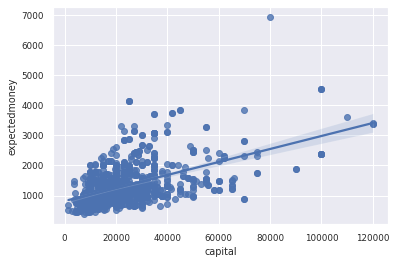

In [16]:
sns.regplot(df1['capital'], df1['expectedmoney'])

**2-3.비정형 데이터(자연어) 원-핫 인코딩**</br>
</br>
자연어로 되어있는 'foodtype' , 'locate' 컬럼을 분석조건에 넣기위해서는 처리가 필요하다.</br>
object 타입의 컬럼들을 원-핫 인코딩(One-Hot Encoding)으로 처리한다.


In [17]:
non_numeric = df1.select_dtypes(np.object) #타입이 object인 데이터 선택 (foodtype, locate)

In [18]:
def onehot(col_list):
    global df1
    while len(col_list) !=0:
        col=col_list.pop(0)
        data_encoded= pd.get_dummies(df1[col], prefix=col)
        df1= pd.merge(df1, data_encoded,left_index=True,right_index=True,how='left')
        df1= df1.drop(columns=col)
    print(df1.shape)
    
onehot(list(non_numeric))

(1122, 17)


In [19]:
df1

,id,expectedmoney,capital,foodtype_고기,foodtype_디저트,foodtype_베이커리,foodtype_분식,foodtype_일식,foodtype_중식,foodtype_치킨,foodtype_커피,foodtype_패스트푸드,foodtype_퓨전음식,foodtype_한식,locate_경기,locate_서울,locate_인천
0,723583,1780.0,20000,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,720667,890.0,18000,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,722103,1550.0,11000,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,722222,3750.0,42000,0,0,0,0,0,0,0,0,0,1,0,1,0,0
5,597994,1800.0,23000,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,720665,870.0,19000,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1225,715770,1350.0,23000,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1226,706858,1050.0,47000,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1227,717883,1300.0,19000,1,0,0,0,0,0,0,0,0,0,0,0,1,0


**3. 머신러닝 모델 학습& 예측& 성능 평가**</br>
</br>
**3-1. 피처 스케일링</br>**
각 피처(열)의 데이터 크기에 따른 상대적 영향력의 차이를 제거하기 위해, 피처의 크기를 비슷한 수준으로 맞춰주는 작업. 

In [20]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()

# df_scaled=df1.iloc[:, :-1]   #마지막열임을 나타내는 -1은 포함하지 않음
# scaler.fit(df_scaled)
# df_scaled=scaler.transform(df_scaled)

# #스케일링 변환된 값을 데이터프레임에 반영
# df1.iloc[:, :-1]=df_scaled[:, :]
# df1.head()

**3-2. 학습 데이터와 테스트 데이터 분할**</br></br>
샘플 중 20%를 모델 평가에 사용

In [21]:
colList = list(df1.columns)
colList.remove('id')
colList.remove('expectedmoney')

In [22]:
colList

['capital',
 'foodtype_고기',
 'foodtype_디저트',
 'foodtype_베이커리',
 'foodtype_분식',
 'foodtype_일식',
 'foodtype_중식',
 'foodtype_치킨',
 'foodtype_커피',
 'foodtype_패스트푸드',
 'foodtype_퓨전음식',
 'foodtype_한식',
 'locate_경기',
 'locate_서울',
 'locate_인천']

In [23]:
#학습데이터와 테스트데이터 분할
from sklearn.model_selection import train_test_split
x_data=df1.loc[:, colList]
y_data=df1.loc[:, 'expectedmoney']
x_train, x_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(897, 15) (897,)
(225, 15) (225,)


**3-3. 베이스라인 모델-선형 회귀**
</br> 단순한 모델이지만 성능이 꽤 좋은 선형 회귀 모델 사용

In [24]:
#선형 회귀 모형
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)

print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값

회귀계수(기울기): [   0.   531.2 -284.4 -453.1 -115.   160.7  495.1  233.  -355.2 -231.7
  120.5 -101.    43.6   -8.   -35.7]
상수항(절편): 835.5


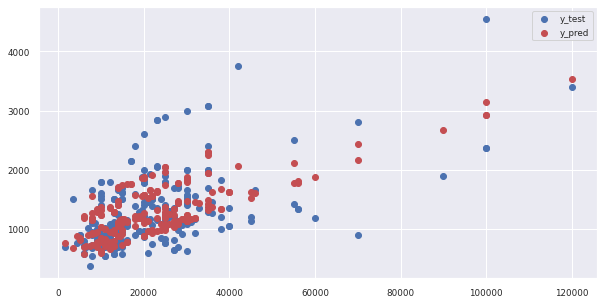

In [25]:
#예측값 저장
y_test_pred=lr.predict(x_test)

#예측값과 실제값의 분포
plt.figure(figsize=(10, 5)) #표 크기 지정
plt.scatter(x_test['capital'], y_test, label='y_test')  #파란점, 실제값
plt.scatter(x_test['capital'], y_test_pred, c='r', label='y_pred')  #빨간점, 예측값
plt.legend(loc='best')  #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

**3-4.성능 평가**

In [26]:
#성능 평가
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_train_pred=lr.predict(x_train)

train_mse=mean_squared_error(y_train, y_train_pred) #훈련 데이터의 평가 점수
print("Train MSE:%.4f" % train_mse)

test_mse=mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

train_mae=mean_absolute_error(y_train, y_train_pred) #훈련 데이터의 평가 점수
print("Train MAE:%.4f" % train_mae)

test_mae=mean_absolute_error(y_test, y_test_pred)
print("Test MAE:%.4f" % test_mae)

Train MSE:204152.7417
Test MSE:180387.6908
Train MAE:322.5416
Test MAE:312.9399


**4. 웹 사이트 사용자 input을 통한 예상수입(income) 예측**</br></br>
ex) 창업지역 '서울' , 관심분야 '고기', 예산 3억 입력 시

In [32]:
x_input = pd.DataFrame({'capital':30000		,'foodtype_고기':	1,'foodtype_디저트':0	,'foodtype_베이커리': 0,	'foodtype_분식':0 ,	'foodtype_일식': 0,	'foodtype_중식': 0,	'foodtype_치킨':0, 'foodtype_커피':0,	'foodtype_패스트푸드': 0,	'foodtype_퓨전음식': 0,	'foodtype_한식':0,	'locate_경기':0,	'locate_서울':1,	'locate_인천': 0},index = [0])

In [33]:
x_input

,capital,foodtype_고기,foodtype_디저트,foodtype_베이커리,foodtype_분식,foodtype_일식,foodtype_중식,foodtype_치킨,foodtype_커피,foodtype_패스트푸드,foodtype_퓨전음식,foodtype_한식,locate_경기,locate_서울,locate_인천
0,30000,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [34]:
income = lr.predict(x_input)

ex) 예측 수익 2430만원

In [35]:
income

array([2124.1600557])

In [31]:
#df1.to_csv('/content/drive/MyDrive/codestates/cp1 dataset/modelData.csv')